# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
#Use PCA (or similar, tbd) to identify features or attributes that correspond to the price

In [2]:
#Train and test various models to predict the price of a car based on attributes provided

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
from time import time
from scipy import stats


In [4]:
df= pd.read_csv('Downloads/hw_week_11/data/vehicles.csv')


In [5]:
df.info()
# A NUMBER OF INCOMPLETE COLUMNS NEED TO BE ADDRESSED

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
# Notice 32k $0 prices.  We will remove these as they generally do not reflect the market sales we are targeting.
df['price'].value_counts()


0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: price, Length: 15655, dtype: int64

In [7]:
#replace price zeroes with nan and drop
df['price'].value_counts()
df['price'] = df['price'].replace(['0', 0], np.nan)

In [8]:
# assume that cars with NAN drive are fwd so we can retain this data
df['drive']=df['drive'].fillna(value='fwd')
df['drive'].value_counts()


fwd    236084
4wd    131904
rwd     58892
Name: drive, dtype: int64

In [9]:
# we will create a type_median row to make this numerical for analysis, and remap it back later for graphing
df['type'].value_counts()


sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

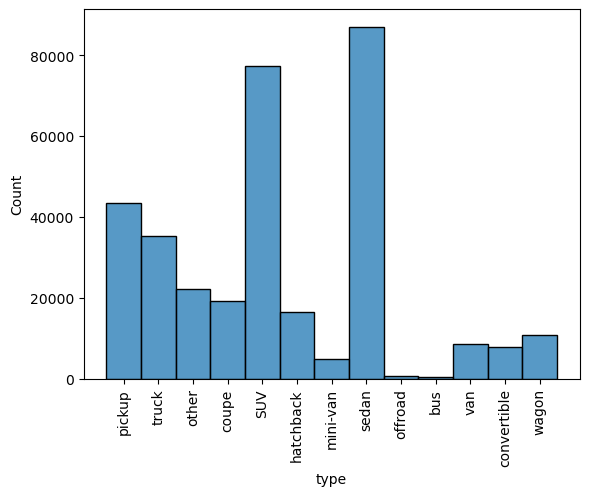

In [10]:
# eyeball histograms to ensure proper distribution
ax=sns.histplot(df['type'])
plt.xticks(rotation=90);
# BUS AND OFFROAD ARE SMALL DATA SETS.  WE SHOULD ENSURE THEY DO NOT CREATE OUTLIERS.


In [11]:
df['model'].value_counts()

f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: model, Length: 29649, dtype: int64

In [12]:
# Dropping columns because they are missing too much data:  cylinders, paint_color, size
# Dropping columns because they are irrelevant or redundant id, VIN, title_status,region
# Dropping model because there are too many unique values- will focus on manufacturer + type as a proxy
# Drop NAN
auto=df.drop(['size','paint_color','VIN','cylinders','title_status','region','model','id'],axis=1).dropna()
auto=auto.dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201835 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         201835 non-null  float64
 1   year          201835 non-null  float64
 2   manufacturer  201835 non-null  object 
 3   condition     201835 non-null  object 
 4   fuel          201835 non-null  object 
 5   odometer      201835 non-null  float64
 6   transmission  201835 non-null  object 
 7   drive         201835 non-null  object 
 8   type          201835 non-null  object 
 9   state         201835 non-null  object 
dtypes: float64(3), object(7)
memory usage: 16.9+ MB


In [13]:
#auto=auto.drop('index',axis=1)
auto.reset_index(drop=True)
auto.head()

,price,year,manufacturer,condition,fuel,odometer,transmission,drive,type,state
27,33590.0,2014.0,gmc,good,gas,57923.0,other,fwd,pickup,al
28,22590.0,2010.0,chevrolet,good,gas,71229.0,other,fwd,pickup,al
29,39590.0,2020.0,chevrolet,good,gas,19160.0,other,fwd,pickup,al
30,30990.0,2017.0,toyota,good,gas,41124.0,other,fwd,pickup,al
31,15000.0,2013.0,ford,excellent,gas,128000.0,automatic,rwd,truck,al


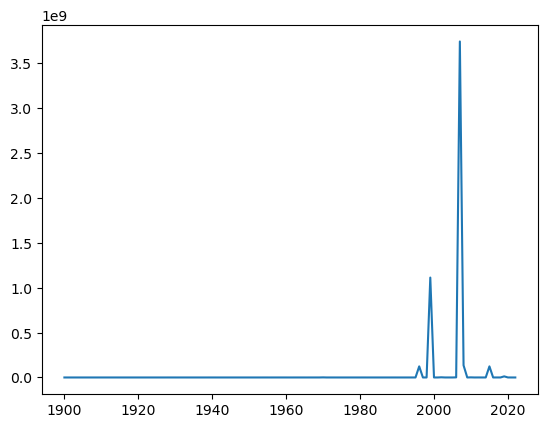

In [14]:
# Chart shows that we need to remove some outliers
plt.plot(auto.groupby('year')['price'].max())


In [15]:
# remove top .001%
auto=auto[auto.price < auto.price.quantile(.999)]

In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201632 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         201632 non-null  float64
 1   year          201632 non-null  float64
 2   manufacturer  201632 non-null  object 
 3   condition     201632 non-null  object 
 4   fuel          201632 non-null  object 
 5   odometer      201632 non-null  float64
 6   transmission  201632 non-null  object 
 7   drive         201632 non-null  object 
 8   type          201632 non-null  object 
 9   state         201632 non-null  object 
dtypes: float64(3), object(7)
memory usage: 16.9+ MB


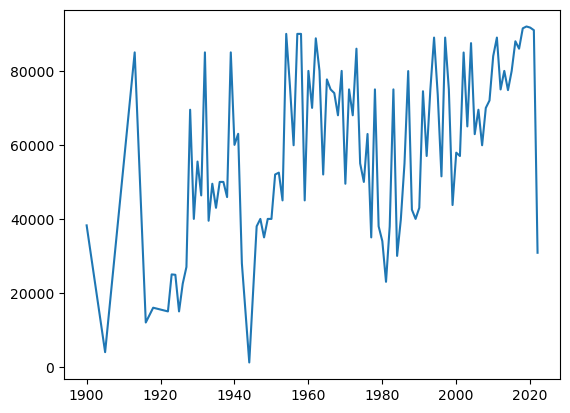

In [17]:
# plot looks more sensible
plt.plot(auto.groupby('year')['price'].max())

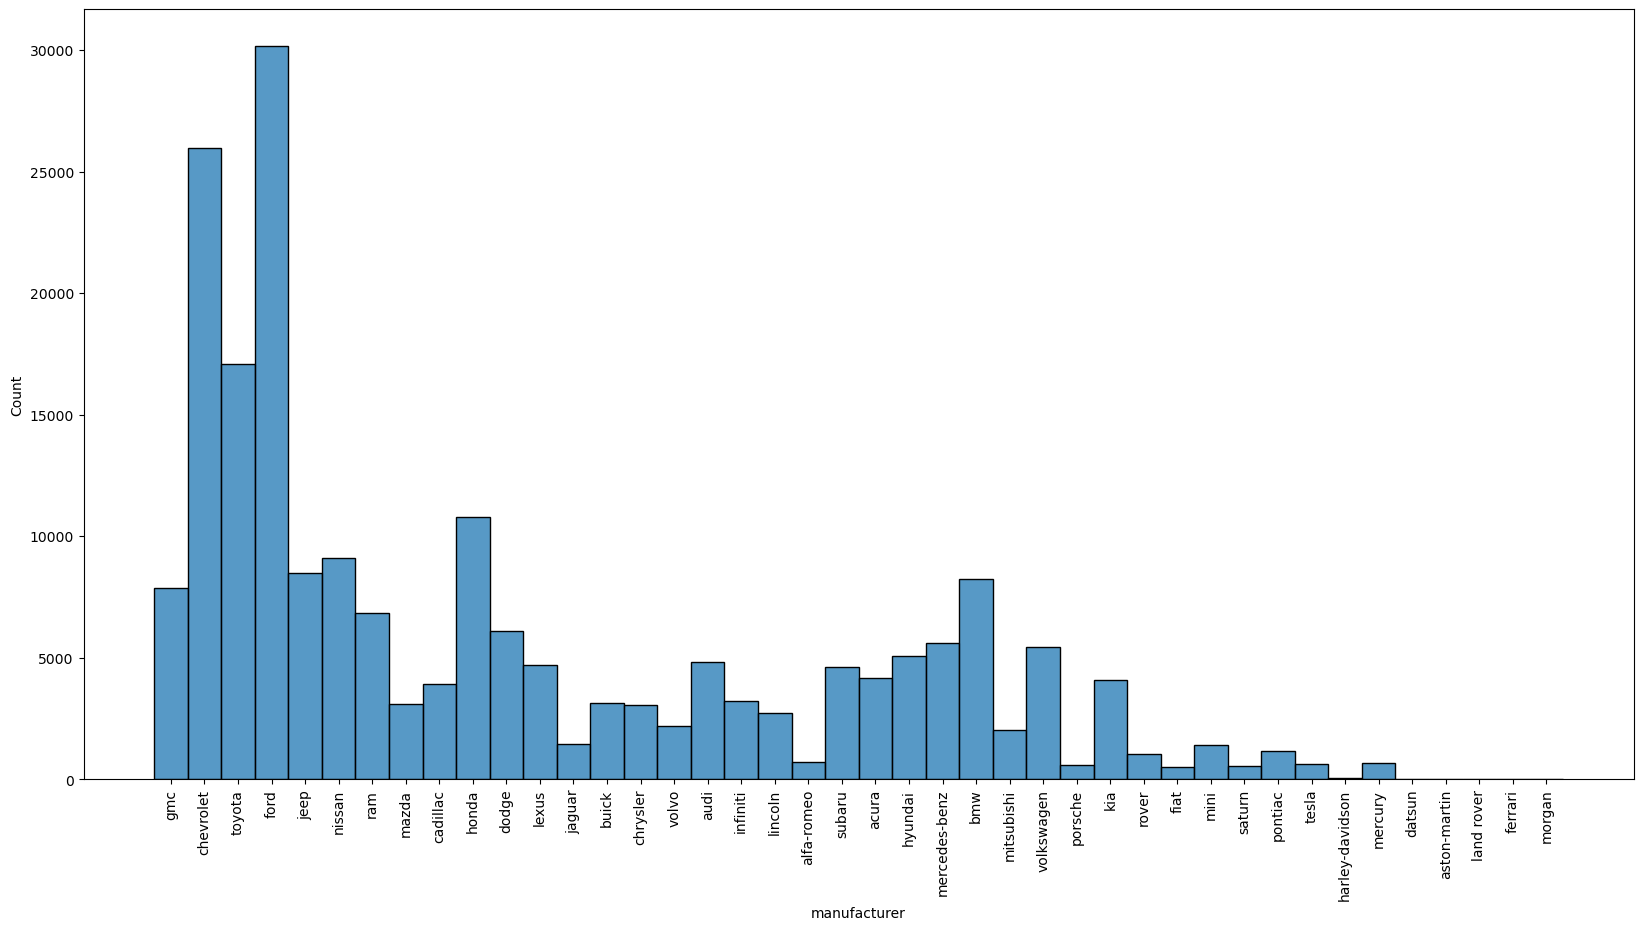

In [18]:
# We want to keep manufacturer and type data, because we know from business team that it affects price.  
# For example, a Ferrari will pretty much always cost more than a Saturn.
# in order to maintain a numeric value, we will convert manufacturer into a manufacturer median.
# Note that we chose median bc there are extreme outliers, including some million dollar Chevy and Fords.
# We will map the manufacturer back based on the median later in the process for presentation.
# We will apply the same method to type, but throw away model because the data has nearly 30k unique values.
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.histplot(auto['manufacturer'])
plt.xticks(rotation=90)
#sns.set(font_scale=2)
plt.show();

In [19]:
manu_median=auto.groupby('manufacturer')['price'].median()
manu_median=manu_median.sort_values()
print(manu_median)

manufacturer
saturn              4295.0
mercury             4471.0
pontiac             5000.0
land rover          7995.0
chrysler            8400.0
honda               9250.0
nissan             10888.0
hyundai            10999.0
subaru             11995.0
harley-davidson    12500.0
dodge              12500.0
kia                12995.0
mazda              13737.0
toyota             13999.0
datsun             14000.0
fiat               15590.0
volkswagen         15590.0
ford               15900.0
mini               15990.0
chevrolet          16500.0
buick              16995.0
mitsubishi         18000.0
jeep               18500.0
volvo              18990.0
mercedes-benz      19590.0
bmw                20896.5
cadillac           21000.0
lexus              22990.0
infiniti           23900.0
acura              23990.0
gmc                24590.0
lincoln            24590.0
rover              24990.0
ram                25999.5
porsche            26500.0
audi               28590.0
alfa-romeo     

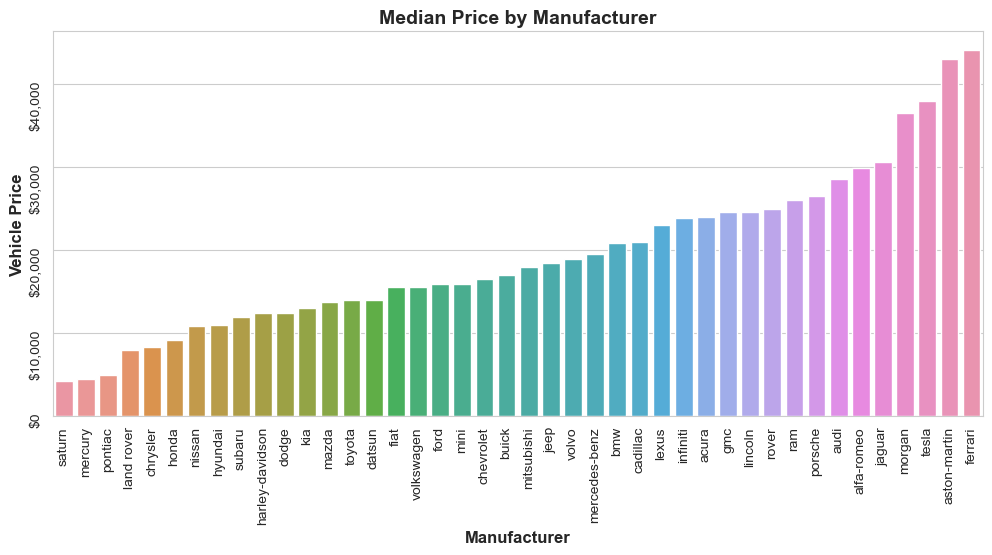

In [20]:
manu_median_plot=manu_median
# plot median price by manufacturer as this is a strong price driver
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axmm = plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
axmm=sns.barplot(x=manu_median_plot.index,y=manu_median_plot.values)
axmm.set_title("Median Price by Manufacturer",fontdict={'size': 14, 'weight': 'bold'})
axmm.set_xlabel('Manufacturer',fontdict={'size': 12, 'weight': 'bold'})
axmm.set_ylabel('Vehicle Price',fontdict={'size': 12, 'weight': 'bold'})
axmm.yaxis.set_major_formatter(tick) 
#axmm.figure.tight_layout()
axmm.tick_params(rotation=90)
plt.savefig("/var/local/data/auto_price_predictor/images/Median_Price_By_Manu.png");
#plt.xticks(rotation=90);

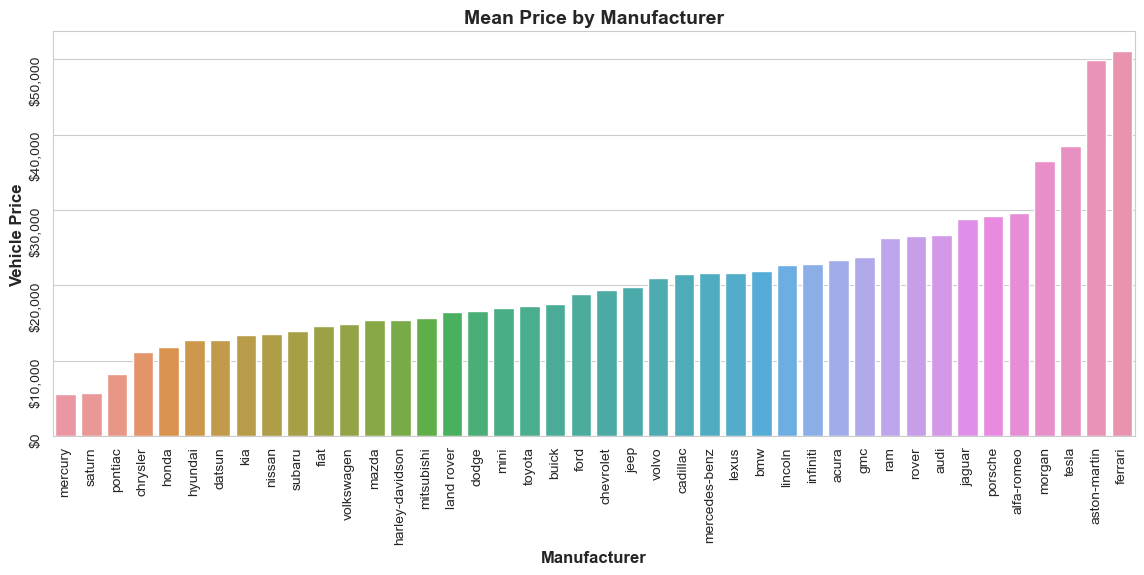

In [21]:
# mean and median look similar, which is a good sign for our dataset
manu_mean=auto.groupby('manufacturer')['price'].mean()
manu_mean=manu_mean.sort_values(ascending=True)
manu_mean_plot=manu_mean
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axmn = plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
axmn=sns.barplot(x=manu_mean_plot.index,y=manu_mean_plot.values)
axmn.set_title("Mean Price by Manufacturer",fontdict={'size': 14, 'weight': 'bold'})
axmn.set_xlabel('Manufacturer',fontdict={'size': 12, 'weight': 'bold'})
axmn.set_ylabel('Vehicle Price',fontdict={'size': 12, 'weight': 'bold'})
axmn.yaxis.set_major_formatter(tick) 
axmn.figure.tight_layout()
axmn.tick_params(rotation=90);





In [22]:
#Apply similar method to type- calculate a median and add to dataset for regression analysis
type_median=auto.groupby('type')['price'].median()
type_median=type_median.sort_values()
print(type_median)

type
mini-van        6995.0
sedan          10800.0
offroad        12995.0
wagon          12998.0
SUV            13000.0
bus            13650.0
van            14999.0
convertible    15000.0
hatchback      15990.0
truck          19500.0
coupe          20995.0
pickup         27990.0
other          30590.0
Name: price, dtype: float64


In [23]:
auto['manu_median']=np.nan
auto['type_median']=np.nan
auto=auto.reset_index(drop=True)
print(auto.head(3))


     price    year manufacturer condition fuel  odometer transmission drive  \
0  33590.0  2014.0          gmc      good  gas   57923.0        other   fwd   
1  22590.0  2010.0    chevrolet      good  gas   71229.0        other   fwd   
2  39590.0  2020.0    chevrolet      good  gas   19160.0        other   fwd   

     type state  manu_median  type_median  
0  pickup    al          NaN          NaN  
1  pickup    al          NaN          NaN  
2  pickup    al          NaN          NaN  


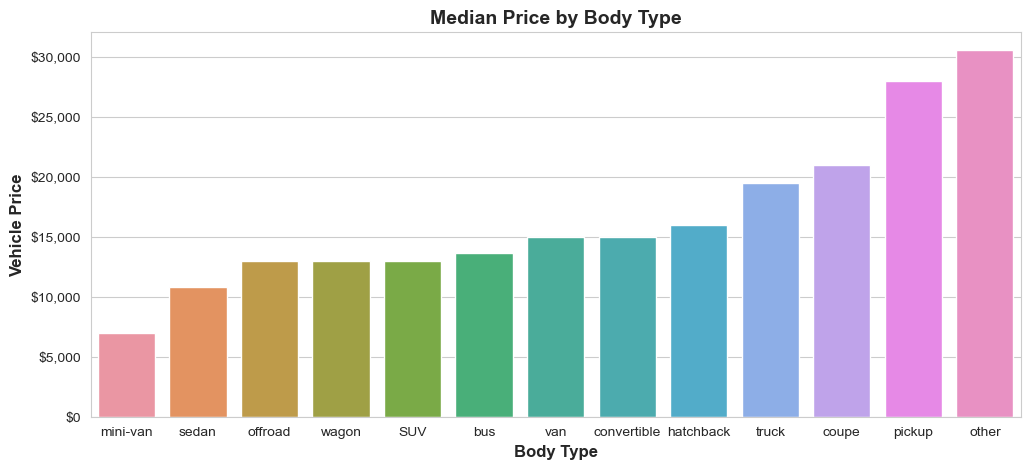

In [24]:
# plot median price by type as this is a strong price driver
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axtm = plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
axtm=sns.barplot(x=type_median.index,y=type_median.values)

axtm.set_title("Median Price by Body Type",fontdict={'size': 14, 'weight': 'bold'})
axtm.set_xlabel('Body Type',fontdict={'size': 12, 'weight': 'bold'})
axtm.set_ylabel('Vehicle Price',fontdict={'size': 12, 'weight': 'bold'})
axtm.yaxis.set_major_formatter(tick) 
axmm.figure.tight_layout()
#axtm.tick_params(rotation=90)
plt.savefig("/var/local/data/auto_price_predictor/images/Median_Price_By_Type.png");
#plt.xticks(rotation=90);

In [25]:
print(manu_median)

manufacturer
saturn              4295.0
mercury             4471.0
pontiac             5000.0
land rover          7995.0
chrysler            8400.0
honda               9250.0
nissan             10888.0
hyundai            10999.0
subaru             11995.0
harley-davidson    12500.0
dodge              12500.0
kia                12995.0
mazda              13737.0
toyota             13999.0
datsun             14000.0
fiat               15590.0
volkswagen         15590.0
ford               15900.0
mini               15990.0
chevrolet          16500.0
buick              16995.0
mitsubishi         18000.0
jeep               18500.0
volvo              18990.0
mercedes-benz      19590.0
bmw                20896.5
cadillac           21000.0
lexus              22990.0
infiniti           23900.0
acura              23990.0
gmc                24590.0
lincoln            24590.0
rover              24990.0
ram                25999.5
porsche            26500.0
audi               28590.0
alfa-romeo     

In [26]:
# look for duplicates
# we will use this later to map back to manufacturer
print(manu_median.duplicated())

manufacturer
saturn             False
mercury            False
pontiac            False
land rover         False
chrysler           False
honda              False
nissan             False
hyundai            False
subaru             False
harley-davidson    False
dodge               True
kia                False
mazda              False
toyota             False
datsun             False
fiat               False
volkswagen          True
ford               False
mini               False
chevrolet          False
buick              False
mitsubishi         False
jeep               False
volvo              False
mercedes-benz      False
bmw                False
cadillac           False
lexus              False
infiniti           False
acura              False
gmc                False
lincoln             True
rover              False
ram                False
porsche            False
audi               False
alfa-romeo         False
jaguar             False
morgan             False
tesla       

In [27]:
#  Increment duplicate values by one dollar to maintain unique values for mapping data back later
manu_median['volkswagen']=(manu_median['volkswagen']+1)
manu_median['dodge']=(manu_median['dodge']+1)
manu_median['lincoln']=(manu_median['lincoln']+1)
type_median['van']=(type_median['van']+1)
print(manu_median.keys)

<bound method Series.keys of manufacturer
saturn              4295.0
mercury             4471.0
pontiac             5000.0
land rover          7995.0
chrysler            8400.0
honda               9250.0
nissan             10888.0
hyundai            10999.0
subaru             11995.0
harley-davidson    12500.0
dodge              12501.0
kia                12995.0
mazda              13737.0
toyota             13999.0
datsun             14000.0
fiat               15590.0
volkswagen         15591.0
ford               15900.0
mini               15990.0
chevrolet          16500.0
buick              16995.0
mitsubishi         18000.0
jeep               18500.0
volvo              18990.0
mercedes-benz      19590.0
bmw                20896.5
cadillac           21000.0
lexus              22990.0
infiniti           23900.0
acura              23990.0
gmc                24590.0
lincoln            24591.0
rover              24990.0
ram                25999.5
porsche            26500.0
audi         

In [28]:
# check for dupes
print(type_median.duplicated())

type
mini-van       False
sedan          False
offroad        False
wagon          False
SUV            False
bus            False
van            False
convertible     True
hatchback      False
truck          False
coupe          False
pickup         False
other          False
Name: price, dtype: bool


In [29]:
# YOU CAN IGNORE THIS BOX- used to debug data formatting below

#print(len(auto))
#print(auto.head())
#print(auto.columns)
#print(auto.shape[1])
#print(manu_median['ford'])
print(auto.head())
#print(auto.iloc[[2],[8]])
#t=auto['type'].iloc[[1]].to_string(header=False, index=False)
#m=auto['manufacturer'].iloc[[1]].to_string(header=False, index=False)
#print(t,m)
#print(int(manu_median[m].tolist()[0]))
print(auto.iloc[[4],[auto.shape[1]-2]])


     price    year manufacturer  condition fuel  odometer transmission drive  \
0  33590.0  2014.0          gmc       good  gas   57923.0        other   fwd   
1  22590.0  2010.0    chevrolet       good  gas   71229.0        other   fwd   
2  39590.0  2020.0    chevrolet       good  gas   19160.0        other   fwd   
3  30990.0  2017.0       toyota       good  gas   41124.0        other   fwd   
4  15000.0  2013.0         ford  excellent  gas  128000.0    automatic   rwd   

     type state  manu_median  type_median  
0  pickup    al          NaN          NaN  
1  pickup    al          NaN          NaN  
2  pickup    al          NaN          NaN  
3  pickup    al          NaN          NaN  
4   truck    al          NaN          NaN  
   manu_median
4          NaN


In [30]:
#update auto dataframe with type and manufacturer median values
# WARNING this take a long time to run!!!!  (get some coffee and look for the 'done!'')

for i in range(0,len(auto)):
#for i in range(0,5):
    t=auto['type'].iloc[[i]].to_string(header=False, index=False)  
    m=auto['manufacturer'].iloc[[i]].to_string(header=False, index=False)
    p=int(manu_median[m])
    q=int(type_median[t])
    #print(p)
    auto.iloc[[i],[auto.shape[1]-2]]=p
    auto.iloc[[i],[auto.shape[1]-1]]=q  
print('done!')


done!


In [31]:
# Convert new columns to int
auto['type_median']=auto['type_median'].astype(int)
auto['manu_median']=auto['manu_median'].astype(int)
auto['year']=auto['year'].astype(int)

In [32]:
# remove lower end outliers
# assume cars that cost less than $500 are outliers or out of scope for targeted resale bc profits are small
auto= auto[auto['price'] > 500]

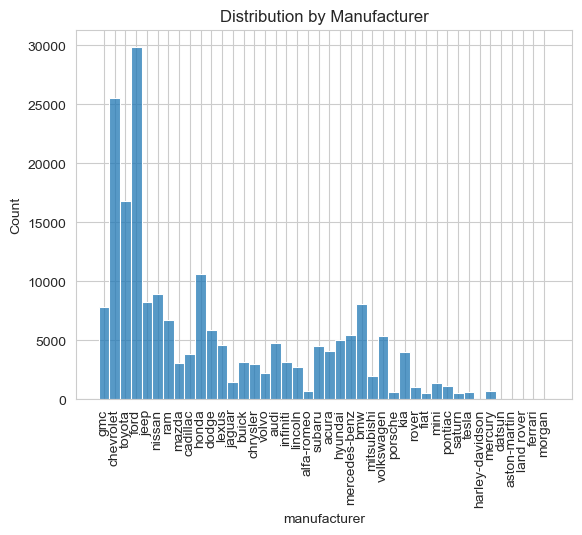

In [33]:
axd=sns.histplot(auto['manufacturer']).set(title='Distribution by Manufacturer')
plt.xticks(rotation=90)
plt.savefig("/var/local/data/auto_price_predictor/images/manu_dist.png");

In [34]:
# numerize condition as ordinal so it can be analyzed
auto['condition'].replace(['new','like new','excellent','good','fair','salvage'],
                        [10,8,7,5,3,1], inplace=True)
print(auto.head())

     price  year manufacturer  condition fuel  odometer transmission drive  \
0  33590.0  2014          gmc          5  gas   57923.0        other   fwd   
1  22590.0  2010    chevrolet          5  gas   71229.0        other   fwd   
2  39590.0  2020    chevrolet          5  gas   19160.0        other   fwd   
3  30990.0  2017       toyota          5  gas   41124.0        other   fwd   
4  15000.0  2013         ford          7  gas  128000.0    automatic   rwd   

     type state  manu_median  type_median  
0  pickup    al        24590        27990  
1  pickup    al        16500        27990  
2  pickup    al        16500        27990  
3  pickup    al        13999        27990  
4   truck    al        15900        19500  


In [35]:
auto['condition'].value_counts()

5     104242
7      74098
8      14570
3       4691
10       592
1        370
Name: condition, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

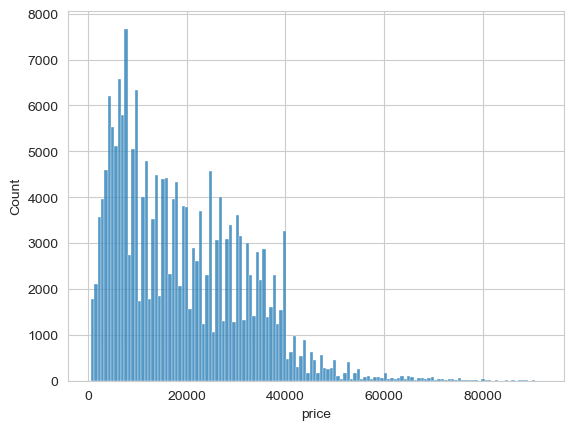

In [36]:
# some negative skew and long positive tail, but this is sensible
sns.histplot(auto['price'])


In [37]:
print(auto['price'].std())

13047.028541501366


In [38]:
auto['price'].min()

501.0

In [39]:
# convert to numerical and normalize data for feature correlation analysis
scaler=StandardScaler()
auto_scaled=auto.select_dtypes(['number'])
scaler.fit(auto_scaled)
auto_scaled=pd.DataFrame(scaler.transform(auto_scaled), columns = auto_scaled.columns)
auto_scaled.rename(columns={'manu_median': 'Manufacturer', 'type_median': 'Body Style'}, inplace=True)
print(auto_scaled.head())


      price      year  condition  odometer  Manufacturer  Body Style
0  1.119917  0.286336  -0.758351 -0.194866      1.419167    1.634155
1  0.276811 -0.156618  -0.758351 -0.117300     -0.099702    1.634155
2  1.579793  0.950768  -0.758351 -0.420832     -0.099702    1.634155
3  0.920637  0.618552  -0.758351 -0.292795     -0.569256    1.634155
4 -0.304932  0.175598   0.878358  0.213642     -0.212350    0.387179


In [40]:
df_corr=abs(auto_scaled.corr()['price'][:])
print('done!')



done!


In [41]:
df_corr=df_corr.sort_values(ascending=True)
df_corr=df_corr.drop('price')
print(df_corr.sort_values(ascending=False))




year            0.432525
Body Style      0.385876
Manufacturer    0.324310
odometer        0.255776
condition       0.102875
Name: price, dtype: float64


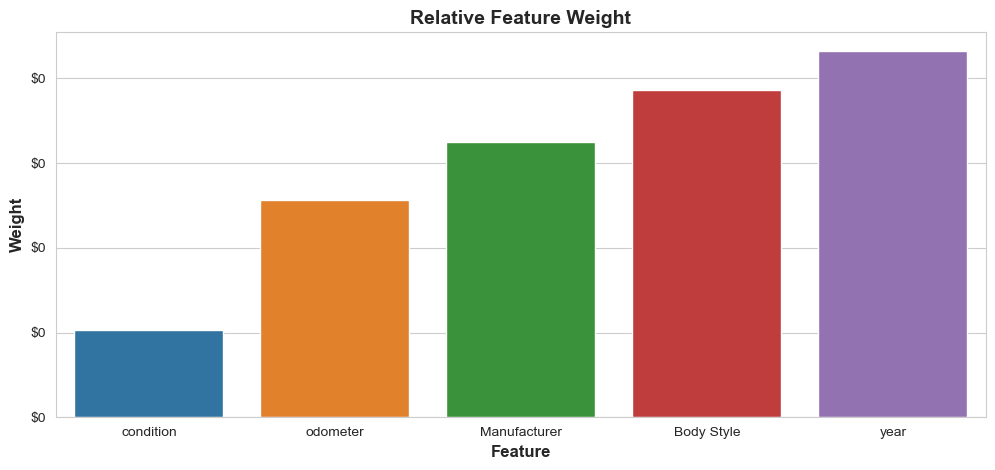

In [42]:

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axrfw = plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
axrfw=sns.barplot(x=df_corr.index, y=df_corr.values)
axrfw.set_title("Relative Feature Weight",fontdict={'size': 14, 'weight': 'bold'})
axrfw.set_xlabel('Feature',fontdict={'size': 12, 'weight': 'bold'})
axrfw.set_ylabel('Weight',fontdict={'size': 12, 'weight': 'bold'})
axrfw.yaxis.set_major_formatter(tick) 
#axmm.figure.tight_layout()
axtm.tick_params(rotation=90)
plt.savefig("/var/local/data/auto_price_predictor/images/Initial_Feature_Weight.png");





### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [43]:
#Convert to numerical data only and create groups for train and test
X=auto.select_dtypes(['number']).drop(['price'],axis=1)
y=auto['price']


In [44]:
#save 30% of data to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size=.3)

In [45]:
# Use a gridsearch to identify best alpha for Ridge on increments
pipe_ridge = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 20, 50, 100.0, 1000.0]}
grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_dict)
grid_ridge.fit(X_train, y_train)
best_alpha_ridge = grid_ridge.best_params_
print(best_alpha_ridge)


{'ridge__alpha': 100.0}


In [46]:
# Repeat Gridsearch for Lasso regression
pipe_lasso = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
param_dict = {'lasso__alpha': [0.001, 0.1, 1.0, 10.0, 20, 50, 100.0, 1000.0]}
grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_dict)
grid_lasso.fit(X_train, y_train)
best_alpha_lasso = grid_lasso.best_params_
print(best_alpha_lasso)

{'lasso__alpha': 20}


In [47]:
# Determine betst params for Random Forest with GridSearch
# Here I trim the train dataset to just 5000 to speed processing

X_train_small=X_train.head(5000)
y_train_small=y_train.head(5000)

param_grid = { 
    'n_estimators': [10,50,100],
    'max_features': ['auto','sqrt'],
    'max_depth' : [4,6,8],
#    'criterion' :['gini', 'entropy']
}

rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv= 5)
rf.fit(X_train_small, y_train_small)
print(rf.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [48]:
#Here I run four regression models and print out the results for comparison

regressors = [
    RandomForestRegressor(max_depth=8,max_features='sqrt',n_estimators=50),
    LinearRegression(),
    Lasso(alpha=1),
    Ridge(alpha=50)
]


#head = 10
for model in regressors:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
#   print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean squared error:", int(mean_squared_error(y_test, y_pred)))
    print("\tMean absolute error:", int(mean_absolute_error(y_test, y_pred)))
    print("\tApprox Accuracy:", int(100*(1-(int(mean_absolute_error(y_test, y_pred))/auto.price.mean()))),'%')
    #   print("\tR2 score:", r2_score(y_test, y_pred))

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=50)
	Training time: 2.050s
	Prediction time: 0.153s
	Mean squared error: 45968922
	Mean absolute error: 4495
	Approx Accuracy: 76 %
LinearRegression()
	Training time: 0.014s
	Prediction time: 0.002s
	Mean squared error: 103825137
	Mean absolute error: 7296
	Approx Accuracy: 61 %
Lasso(alpha=1)
	Training time: 0.007s
	Prediction time: 0.002s
	Mean squared error: 103825206
	Mean absolute error: 7296
	Approx Accuracy: 61 %
Ridge(alpha=50)
	Training time: 0.005s
	Prediction time: 0.001s
	Mean squared error: 103825131
	Mean absolute error: 7296
	Approx Accuracy: 61 %


In [49]:
# Build best model to extract coefficients
price_predictor=RandomForestRegressor(max_depth=8,max_features='sqrt',n_estimators=50)
price_predictor.fit(X_train,y_train)
print('done!')


done!


In [50]:
# Build Dataframe to display feature importance according to random forest (best) model:
feature_weights=pd.DataFrame()
feature_weights['Feature']=price_predictor.feature_names_in_
feature_weights['Feature Weight']=abs(price_predictor.feature_importances_)
feature_weights=feature_weights.sort_values(by='Feature Weight')
print(feature_weights.head())


       Feature  Feature Weight
1    condition        0.020823
3  manu_median        0.085086
4  type_median        0.151245
2     odometer        0.349636
0         year        0.393209


In [51]:
# Formatting in preparation to display with Seaborn
feature_weights.replace("condition","Condition", inplace=True)
feature_weights.replace("manu_median","Manufacturer", inplace=True)
feature_weights.replace("year","Year", inplace=True)
feature_weights.replace("type_median","Body Style", inplace=True)
feature_weights.replace("Odometer","Mileage", inplace=True)
print(feature_weights.head())


        Feature  Feature Weight
1     Condition        0.020823
3  Manufacturer        0.085086
4    Body Style        0.151245
2      odometer        0.349636
0          Year        0.393209


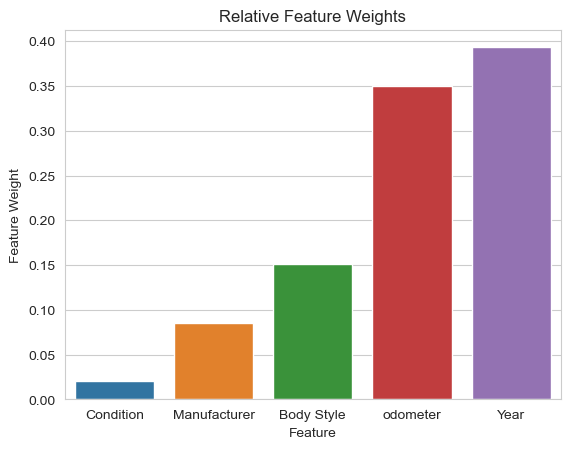

In [52]:
sns.barplot(data=feature_weights,x='Feature',y='Feature Weight').set(title="Relative Feature Weights")
plt.savefig("/var/local/data/auto_price_predictor/images/Relative_Feature_Weights.png") 


In [53]:
#Creating dictionaries which we will use to rebuild original data frame

#condition dictionary
condition_dict={10:'new',8:'like new',7:'excellent',5:'good',3:'fair',1:'salvage'}

#manufacturer dictionary based on median price
manu_median_dict=manu_median.to_dict()
manu_median_dict = {y: x for x, y in manu_median_dict.items()}
print(manu_median_dict)

# type dictionary based on type median price
type_median_dict=type_median.to_dict()
type_median_dict = {y: x for x, y in type_median_dict.items()}
print(type_median_dict)

{4295.0: 'saturn', 4471.0: 'mercury', 5000.0: 'pontiac', 7995.0: 'land rover', 8400.0: 'chrysler', 9250.0: 'honda', 10888.0: 'nissan', 10999.0: 'hyundai', 11995.0: 'subaru', 12500.0: 'harley-davidson', 12501.0: 'dodge', 12995.0: 'kia', 13737.0: 'mazda', 13999.0: 'toyota', 14000.0: 'datsun', 15590.0: 'fiat', 15591.0: 'volkswagen', 15900.0: 'ford', 15990.0: 'mini', 16500.0: 'chevrolet', 16995.0: 'buick', 18000.0: 'mitsubishi', 18500.0: 'jeep', 18990.0: 'volvo', 19590.0: 'mercedes-benz', 20896.5: 'bmw', 21000.0: 'cadillac', 22990.0: 'lexus', 23900.0: 'infiniti', 23990.0: 'acura', 24590.0: 'gmc', 24591.0: 'lincoln', 24990.0: 'rover', 25999.5: 'ram', 26500.0: 'porsche', 28590.0: 'audi', 29900.0: 'alfa-romeo', 30590.0: 'jaguar', 36500.0: 'morgan', 37990.0: 'tesla', 42995.0: 'aston-martin', 44150.0: 'ferrari'}
{6995.0: 'mini-van', 10800.0: 'sedan', 12995.0: 'offroad', 12998.0: 'wagon', 13000.0: 'SUV', 13650.0: 'bus', 15000.0: 'convertible', 15990.0: 'hatchback', 19500.0: 'truck', 20995.0: 'co

In [54]:
# Begin building a df_final where we will reintroduce categorical features to the dataset
df_final=auto.select_dtypes(['number'])

In [55]:
df_final["manufacturer"] = df_final["manu_median"].map(manu_median_dict)
df_final["type"] = df_final["type_median"].map(type_median_dict)
df_final["car_condition"] = df_final["condition"].map(condition_dict)
print(df_final.head())
    

     price  year  condition  odometer  manu_median  type_median manufacturer  \
0  33590.0  2014          5   57923.0        24590        27990          gmc   
1  22590.0  2010          5   71229.0        16500        27990    chevrolet   
2  39590.0  2020          5   19160.0        16500        27990    chevrolet   
3  30990.0  2017          5   41124.0        13999        27990       toyota   
4  15000.0  2013          7  128000.0        15900        19500         ford   

     type car_condition  
0  pickup          good  
1  pickup          good  
2  pickup          good  
3  pickup          good  
4   truck     excellent  


In [56]:
#Convert Odometer into categorical mileage column for final presentation and analysis
def getmilage(x):
    if x >= 0 and x <= 10_000:
        return "brand new"
    if x > 10_000 and x <= 50_000:
        return "low"
    if x > 50_000 and x <= 100_000:
        return "moderate"
    if x > 100_000 and x <= 200_000:
        return "very high"
    if x > 200_000 :
        return "X-tremely high"
    else:
        return 'N/A'

df_final['mileage']=df_final.apply(lambda x: getmilage(x['odometer']),axis=1)


In [57]:
#Convert Year into categorical vintage column for presentation and analysis
def getdecade(x):
    if x >= 1900 and x <= 1959:
        return "Artisan Antique"
    if x >= 1960 and x <= 1980:
        return "Classic Antique"
    if x > 1980 and x <= 1998:
        return "Modern Antique"
    if x > 1998 and x <= 2013:
        return "Very Old"
    if x > 2013 and x <= 2018:
        return "Old"
    if x > 2018 and x <= 2021:
        return "Modern"
    if x > 2021 :
        return "New"
    else:
        return 'N/A'

df_final['vintage']=df_final.apply(lambda x: getdecade(x['year']),axis=1)

In [58]:
print(df_final['vintage'].value_counts())
#df_final.head()

Very Old           89453
Old                73990
Modern             25031
Modern Antique      6766
Classic Antique     2422
Artisan Antique      894
New                    7
Name: vintage, dtype: int64


In [59]:
print(df_final.head())

     price  year  condition  odometer  manu_median  type_median manufacturer  \
0  33590.0  2014          5   57923.0        24590        27990          gmc   
1  22590.0  2010          5   71229.0        16500        27990    chevrolet   
2  39590.0  2020          5   19160.0        16500        27990    chevrolet   
3  30990.0  2017          5   41124.0        13999        27990       toyota   
4  15000.0  2013          7  128000.0        15900        19500         ford   

     type car_condition    mileage   vintage  
0  pickup          good   moderate       Old  
1  pickup          good   moderate  Very Old  
2  pickup          good        low    Modern  
3  pickup          good        low       Old  
4   truck     excellent  very high  Very Old  


In [60]:
# Create price type data frame- this is required to efficiently sort values for Seaborn plot
price_type=(df_final.groupby('type')['price'].median())
print(price_type.sort_values(ascending=True))
df_pt=pd.DataFrame(price_type)
df_pt.reset_index(inplace=True)
df_pt=df_pt.sort_values(by='price')
print(df_pt.head())

type
mini-van        6995.0
sedan          10995.0
offroad        13000.0
SUV            13500.0
wagon          13990.0
bus            14995.0
convertible    15000.0
hatchback      15995.0
truck          19990.0
coupe          21900.0
pickup         27990.0
other          30590.0
Name: price, dtype: float64
        type    price
5   mini-van   6995.0
9      sedan  10995.0
6    offroad  13000.0
0        SUV  13500.0
11     wagon  13990.0


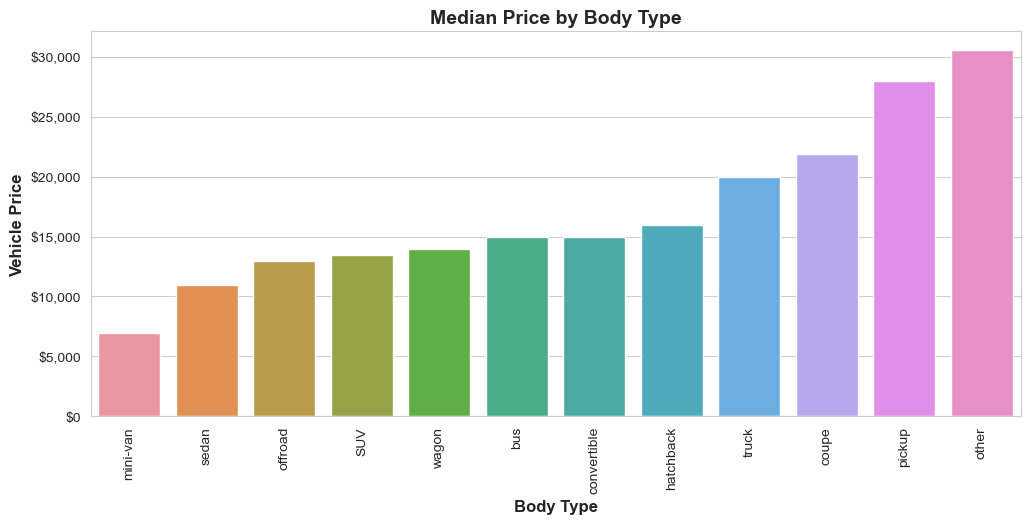

In [61]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axpbt = plt.figure(figsize=(12, 5))

axpbt=sns.barplot(data=df_pt,x='type',y='price',ci=None)
plt.xticks(rotation=90)
sns.set_style("whitegrid")
axpbt.set_title("Median Price by Body Type",fontdict={'size': 14, 'weight': 'bold'})
axpbt.set_xlabel('Body Type',fontdict={'size': 12, 'weight': 'bold'})
axpbt.set_ylabel('Vehicle Price',fontdict={'size': 12, 'weight': 'bold'})
axpbt.yaxis.set_major_formatter(tick) 
#axmm.figure.tight_layout()
axtm.tick_params(rotation=90)
plt.savefig("/var/local/data/auto_price_predictor/images/PricebyBodyType.png");


In [62]:
# Create price-manufacturer data frame- this is required to efficiently sort values for Seaborn plot
price_manu=(df_final.groupby('manufacturer')['price'].median())
print(price_manu.sort_values(ascending=True))
df_pm=pd.DataFrame(price_manu)
#drop ferrari bc it throws off scale
df_pm=df_pm.query("manufacturer != 'ferrari'")
df_pm.reset_index(inplace=True)
df_pm=df_pm.sort_values(by='price')
print(df_pm.head())

manufacturer
saturn              4425.0
mercury             4495.0
pontiac             5100.0
land rover          7995.0
chrysler            8500.0
honda               9500.0
nissan             10990.0
hyundai            11495.0
subaru             12000.0
harley-davidson    12500.0
dodge              12995.0
kia                13325.0
mazda              13990.0
toyota             14500.0
volkswagen         15590.0
mini               15990.0
ford               15990.0
datsun             16100.0
fiat               16500.0
chevrolet          16900.0
buick              17190.0
mitsubishi         18950.0
jeep               18990.0
volvo              18990.0
mercedes-benz      19990.0
cadillac           21990.0
lexus              22990.0
infiniti           23990.0
acura              23990.0
lincoln            24590.0
gmc                24988.0
rover              24990.0
porsche            26995.0
audi               28590.0
alfa-romeo         29900.0
jaguar             30590.0
morgan         

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

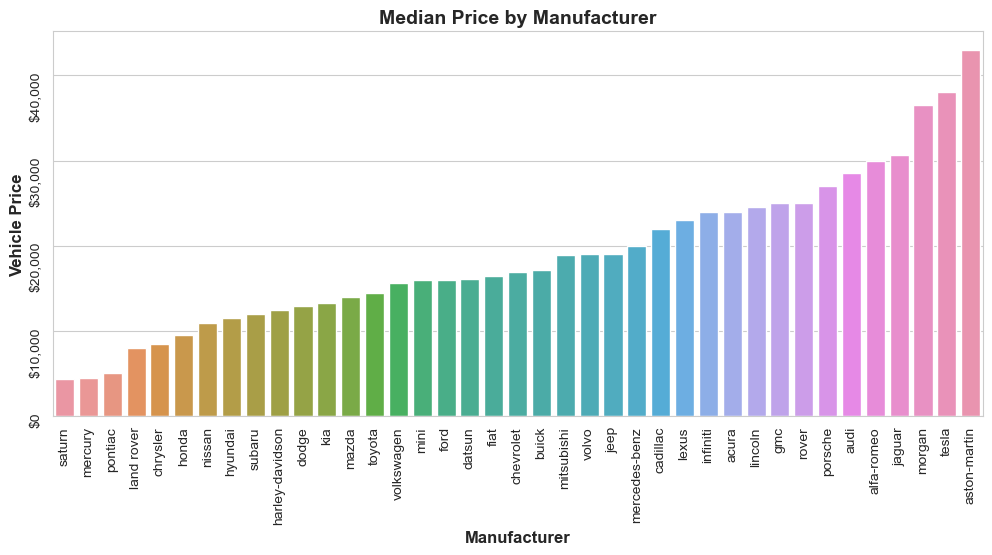

In [63]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
axpbt = plt.figure(figsize=(12, 5))

axpbt=sns.barplot(data=df_pm,x='manufacturer',y='price',ci=None)
plt.xticks(rotation=90)
sns.set_style("whitegrid")
axpbt.set_title("Median Price by Manufacturer",fontdict={'size': 14, 'weight': 'bold'})
axpbt.set_xlabel('Manufacturer',fontdict={'size': 12, 'weight': 'bold'})
axpbt.set_ylabel('Vehicle Price',fontdict={'size': 12, 'weight': 'bold'})
axpbt.yaxis.set_major_formatter(tick) 
#axmm.figure.tight_layout()
axpbt.tick_params(rotation=90)
plt.savefig("/var/local/data/auto_price_predictor/images/PricebyManu.png");

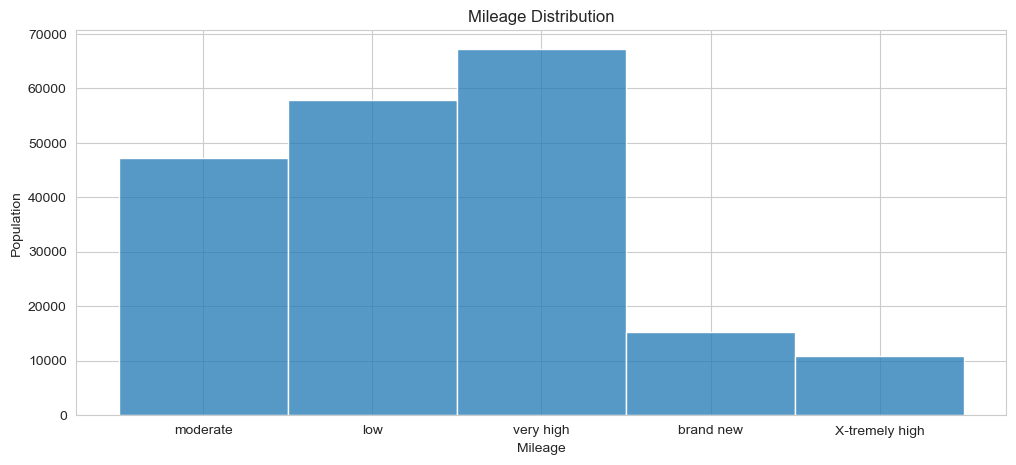

In [64]:
axm1 = plt.figure(figsize=(12, 5))
axm1=sns.histplot(df_final['mileage'])
sns.set_style("darkgrid")
sns.set(font_scale = 1)
#axm1.set_title("Mileage Distribution",fontdict={'size': 7, 'weight': 'bold'})
axm1.set_title("Mileage Distribution")
axm1.set_xlabel('Mileage')
axm1.set_ylabel('Population')
plt.savefig("/var/local/data/auto_price_predictor/images/MileageDistribution.png");

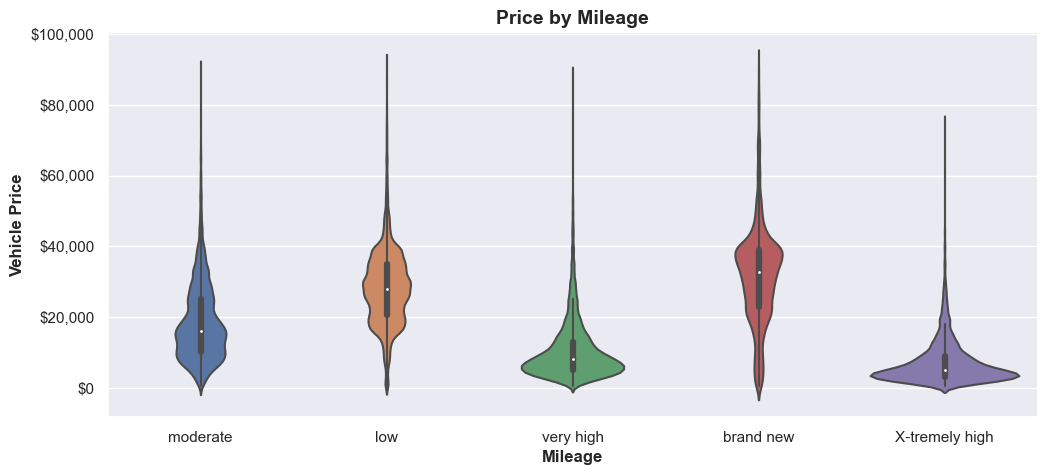

In [65]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax10 = plt.figure(figsize=(12, 5))
ax10=sns.violinplot(data=df_final,x='mileage',y='price') 
sns.set_style("darkgrid")
ax10.set_title("Price by Mileage",fontdict={'size': 14, 'weight': 'bold'})
ax10.set_xlabel('Mileage',fontdict={'size': 12, 'weight': 'bold'})
ax10.set_ylabel('Vehicle Price',fontdict={'size': 12, 'weight': 'bold'})
ax10.yaxis.set_major_formatter(tick)
plt.savefig("/var/local/data/auto_price_predictor/images/PricebyMileage.png");
#axmm.figure.tight_layout()
#ax10.tick_params(rotation=90);

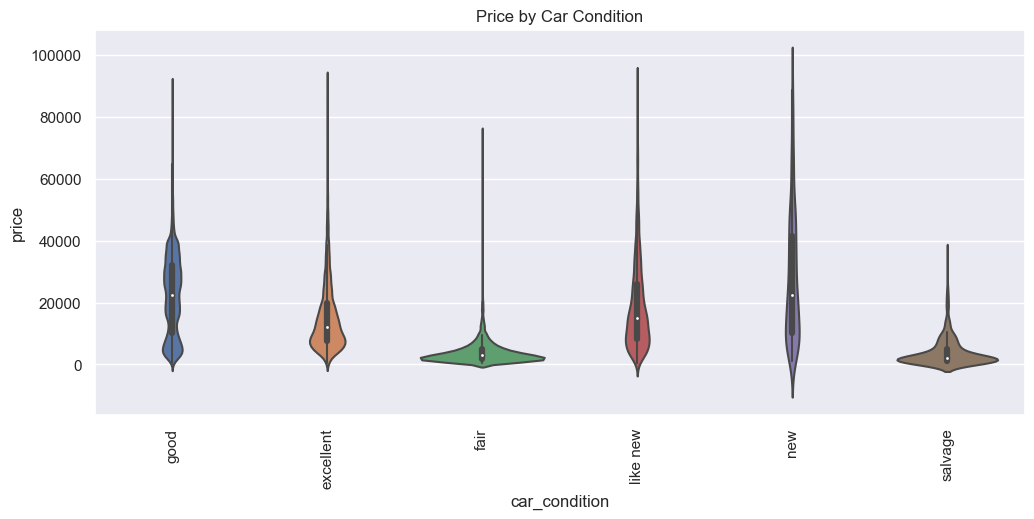

In [66]:
ax11 = plt.figure(figsize=(12, 5))
ax11=sns.violinplot(data=df_final,x='car_condition',y='price').set(title='Price by Car Condition')   
plt.xticks(rotation=90);
plt.savefig("/var/local/data/auto_price_predictor/images/Median_Price_By_Condition.png");

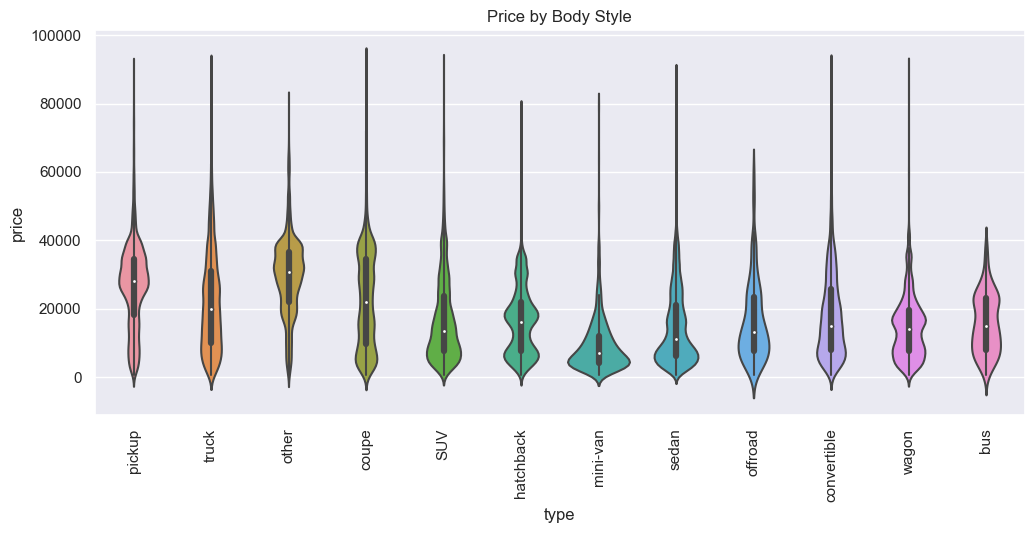

In [67]:
ax12 = plt.figure(figsize=(12, 5))
ax12=sns.violinplot(data=df_final,x='type',y='price').set(title='Price by Body Style')   
plt.xticks(rotation=90);
plt.savefig("/var/local/data/auto_price_predictor/images/Median_Price_By_Body_Style.png");

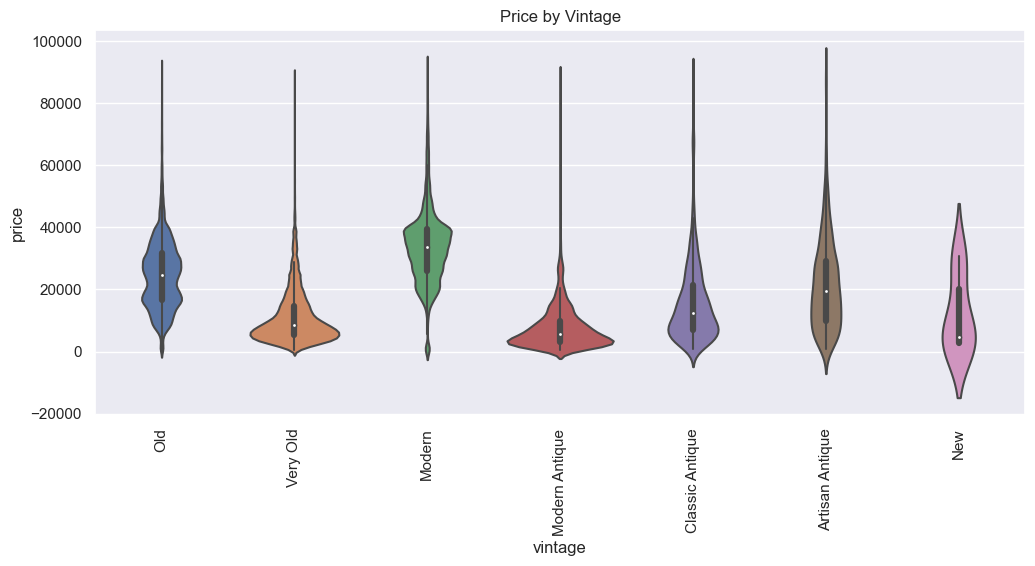

In [68]:
ax14 = plt.figure(figsize=(12, 5))
ax14=sns.violinplot(data=df_final,x='vintage',y='price').set(title='Price by Vintage')   
plt.xticks(rotation=90);

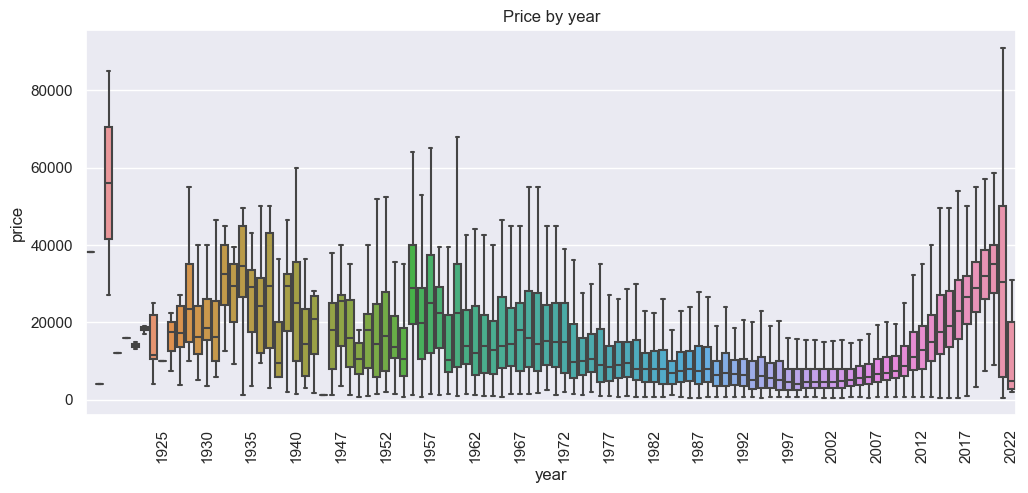

In [69]:
# Note rise in median price once we hit 2012
# cars < 10 years old cost more
ax13 = plt.figure(figsize=(12, 5))
ax13=sns.boxplot(data=df_final,x='year',y='price',showfliers = False).set(title='Price by year') 
plt.xticks(rotation=90);
plt.xticks([8,13,18, 23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,98,103])
plt.savefig("/var/local/data/auto_price_predictor/images/Price_By_Year.png");


In [70]:
vints=["Classic Antique","Artisan Antique"]
#vints=["Classic Antique"]

old_mint=df_final.query('vintage in @vints')
print(old_mint.head())

       price  year  condition  odometer  manu_median  type_median  \
159   5500.0  1978          5  239000.0        15900        19500   
164   5500.0  1974          5    9999.0        19590        15000   
172  19950.0  1955          5   96867.0        16500        10800   
190   4000.0  1972          3   88100.0        19590        20995   
302   8700.0  1979          7   22964.0        24591        10800   

      manufacturer         type car_condition         mileage          vintage  
159           ford        truck          good  X-tremely high  Classic Antique  
164  mercedes-benz  convertible          good       brand new  Classic Antique  
172      chevrolet        sedan          good        moderate  Artisan Antique  
190  mercedes-benz        coupe          fair        moderate  Classic Antique  
302        lincoln        sedan     excellent             low  Classic Antique  


In [71]:
old_mint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 159 to 201537
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3316 non-null   float64
 1   year           3316 non-null   int64  
 2   condition      3316 non-null   int64  
 3   odometer       3316 non-null   float64
 4   manu_median    3316 non-null   int64  
 5   type_median    3316 non-null   int64  
 6   manufacturer   3310 non-null   object 
 7   type           3316 non-null   object 
 8   car_condition  3316 non-null   object 
 9   mileage        3316 non-null   object 
 10  vintage        3316 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 310.9+ KB


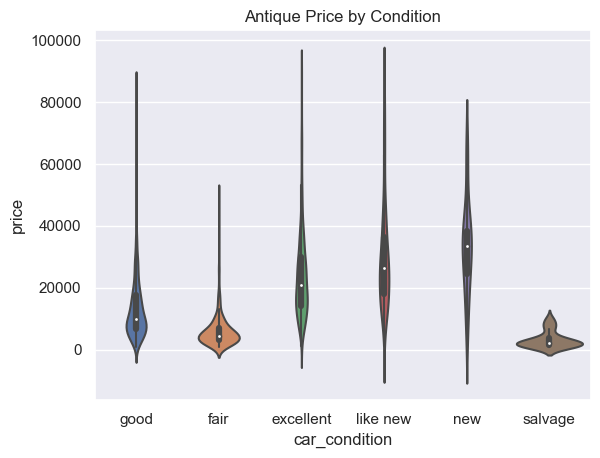

In [72]:
axv=sns.violinplot(data=old_mint,x='car_condition',y='price').set(title='Antique Price by Condition')  

In [73]:
istruck=["truck","pickup"]
#vints=["Classic Antique"]

trucks=df_final.query('type in @istruck')
print(trucks.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44179 entries, 0 to 201600
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          44179 non-null  float64
 1   year           44179 non-null  int64  
 2   condition      44179 non-null  int64  
 3   odometer       44179 non-null  float64
 4   manu_median    44179 non-null  int64  
 5   type_median    44179 non-null  int64  
 6   manufacturer   37719 non-null  object 
 7   type           44179 non-null  object 
 8   car_condition  44179 non-null  object 
 9   mileage        44179 non-null  object 
 10  vintage        44179 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.0+ MB
None


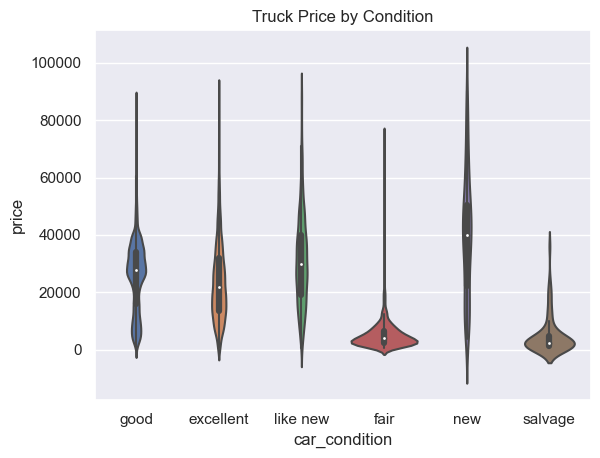

In [74]:
axt=sns.violinplot(data=trucks,x='car_condition',y='price').set(title='Truck Price by Condition')  

In [75]:
iscoupe=["coupe"]
coupes=df_final.query('type in @iscoupe')
print(coupes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13153 entries, 14 to 201631
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          13153 non-null  float64
 1   year           13153 non-null  int64  
 2   condition      13153 non-null  int64  
 3   odometer       13153 non-null  float64
 4   manu_median    13153 non-null  int64  
 5   type_median    13153 non-null  int64  
 6   manufacturer   11889 non-null  object 
 7   type           13153 non-null  object 
 8   car_condition  13153 non-null  object 
 9   mileage        13153 non-null  object 
 10  vintage        13153 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.2+ MB
None


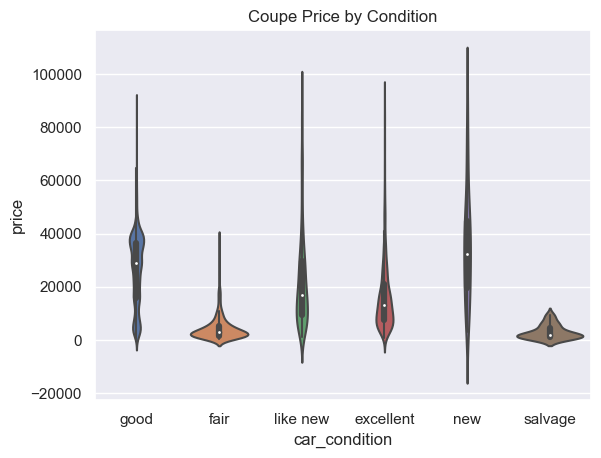

In [76]:
axc=sns.violinplot(data=coupes,x='car_condition',y='price').set(title='Coupe Price by Condition')  

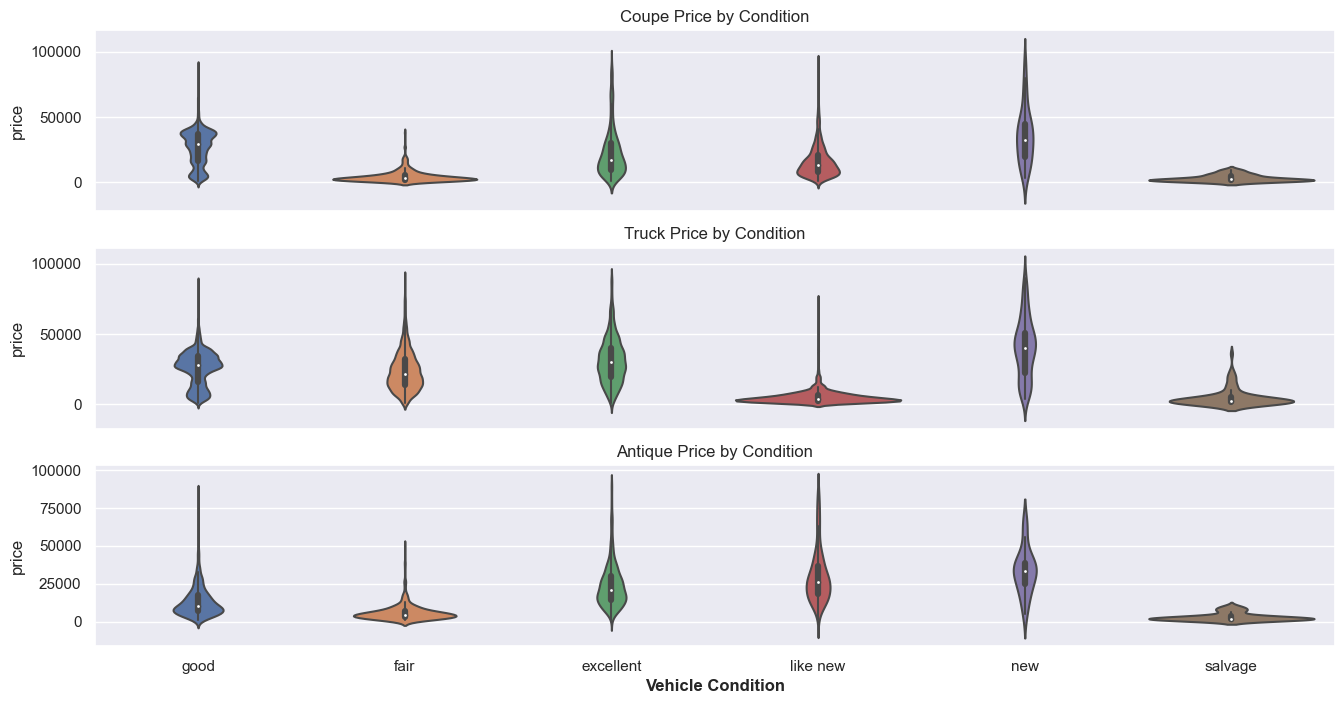

In [77]:
#plot on a single plot
# ToDo: Need to investigate why there were cheap new trucks.  I heard about a glut of new trucks after covid.  
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(16,8))
axc=sns.violinplot(ax=axes[0],data=coupes,x='car_condition',y='price').set(title='Coupe Price by Condition')  
axes[0].set(xlabel=None)
axt=sns.violinplot(ax=axes[1],data=trucks,x='car_condition',y='price').set(title='Truck Price by Condition') 
axes[1].set(xlabel=None)
axv=sns.violinplot(ax=axes[2],data=old_mint,x='car_condition',y='price').set(title='Antique Price by Condition') 
axes[2].set_xlabel('Vehicle Condition',fontdict={'size': 12, 'weight': 'bold'})
plt.savefig("/var/local/data/auto_price_predictor/images/Cohort_Price_By_Conditions.png");

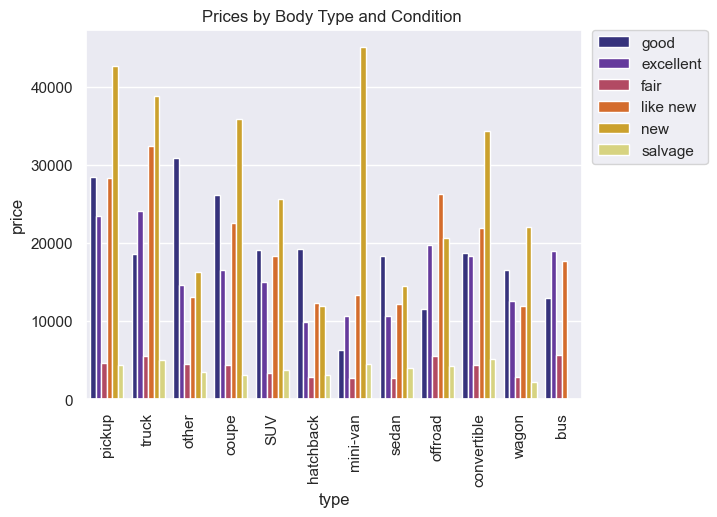

In [78]:
ax6=sns.barplot(data=df_final,x='type',y='price',hue='car_condition',ci=None,palette="CMRmap").set(title="Prices by Body Type and Condition ")
#sns.set_style("winter")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("/var/local/data/auto_price_predictor/images/all_models_price_x_type_condition.png") 
#plt.show();

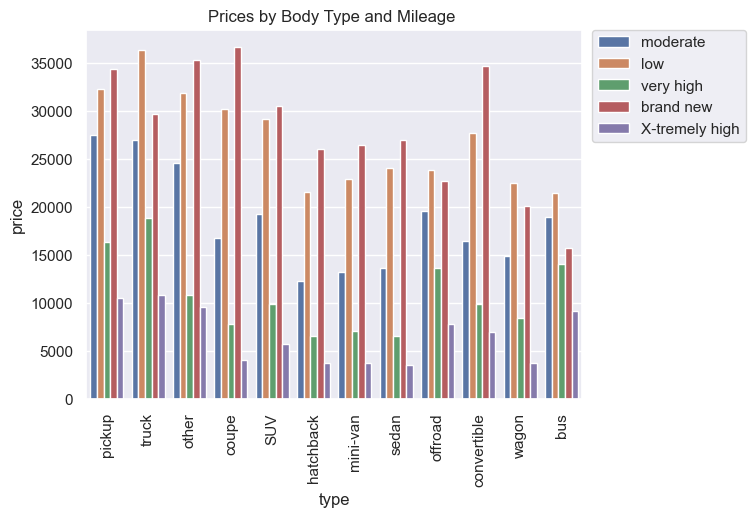

In [79]:
ax5=sns.barplot(data=df_final,x='type',y='price',hue='mileage',ci=None).set(title="Prices by Body Type and Mileage ")
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.set(font_scale=1)
plt.savefig("/var/local/data/auto_price_predictor/images/all_models_price_x_type_mileage.png") 
#plt.show();

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [80]:
# See Readme for final writeup